In [1]:
import numpy as np
import librosa
import IPython.display as ipd

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [51]:
128 * 20

2560

In [2]:
filename = librosa.example('nutcracker') # 1. Get the file path to an included audio example
filename

'/home/javi/.cache/librosa/Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg'

In [3]:
ipd.Audio(filename)

In [4]:
x, sr = librosa.load(filename)

print("Sampling Rate:", sr)
print("waveform points:", x.shape[0])

Sampling Rate: 22050
waveform points: 2643264


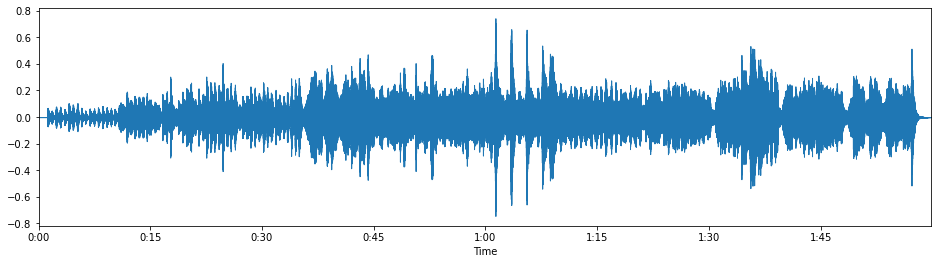

In [5]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x, sr=sr);

In [6]:
x_complex = librosa.stft(x) # Returns complex number
x_freqs  =  np.abs(x_complex)
x_phases =  np.angle(x_complex)

x_freqs.shape

(1025, 5163)

In [7]:
x_freqs

array([[2.48864671e-05, 1.24384487e-05, 6.37271524e-09, ...,
        1.71688328e-07, 4.22014818e-06, 3.98535049e-05],
       [2.48954984e-05, 1.24446869e-05, 6.00983707e-09, ...,
        1.08034484e-07, 4.44241778e-06, 3.99585842e-05],
       [2.49375043e-05, 1.24694288e-05, 7.28515070e-09, ...,
        5.25828838e-08, 4.35185666e-06, 4.00014942e-05],
       ...,
       [5.53203863e-05, 2.66945790e-05, 2.35119637e-06, ...,
        8.88972834e-04, 6.47871464e-04, 7.95280153e-04],
       [5.92234828e-05, 3.10226242e-05, 1.58448415e-06, ...,
        6.16502191e-04, 1.05748395e-03, 8.05924064e-04],
       [6.18825215e-05, 3.04926489e-05, 1.02227602e-06, ...,
        1.47345549e-04, 7.78414658e-04, 1.04493368e-03]], dtype=float32)

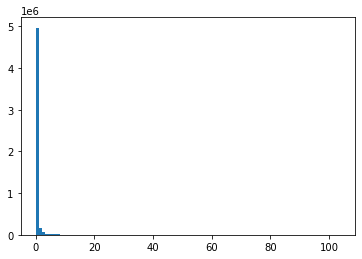

In [19]:
plt.hist(x_freqs.reshape(-1), bins=100) #  bins='auto'
plt.show()

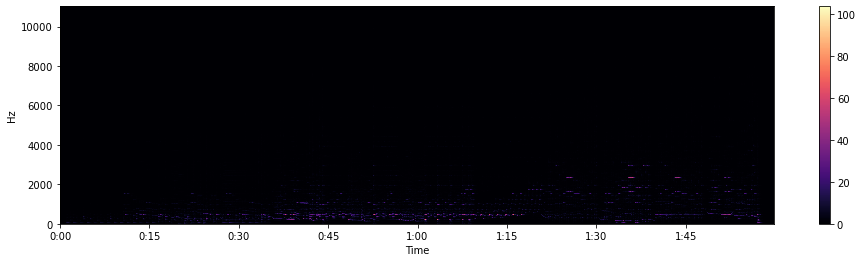

In [27]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(x_freqs, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

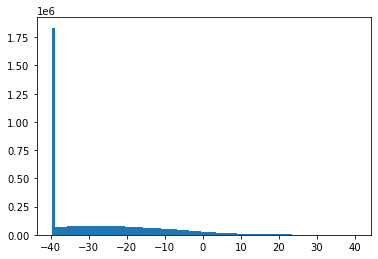

In [20]:
x_freqs_db = librosa.amplitude_to_db(x_freqs)
plt.hist(x_freqs_db.reshape(-1), bins=100) #  bins='auto'
plt.show()

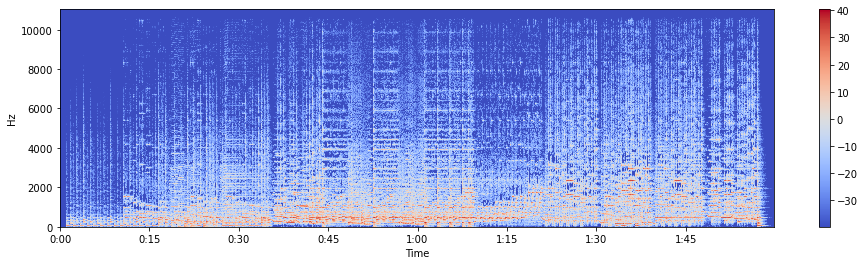

In [26]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(x_freqs_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

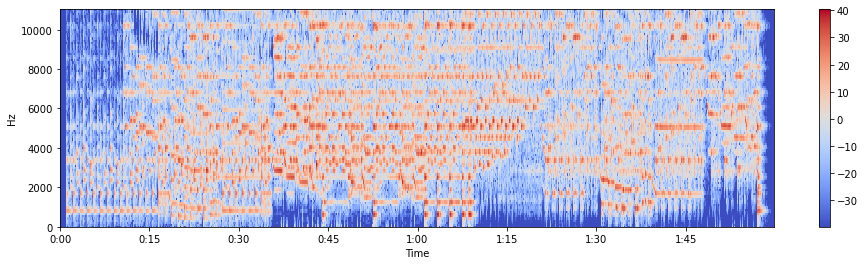

In [32]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(x_freqs_db[:100,:], sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

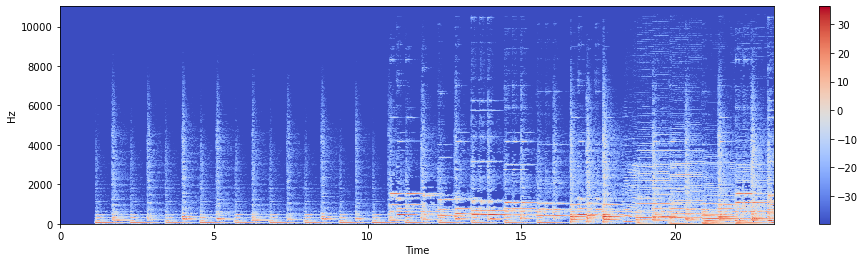

In [30]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(x_freqs_db[:,:1000], sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


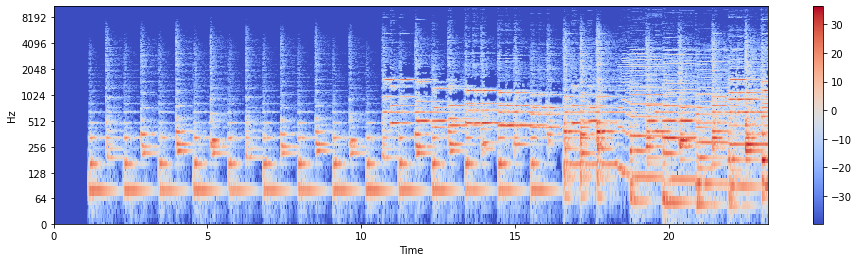

In [33]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(x_freqs_db[:,:1000], sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

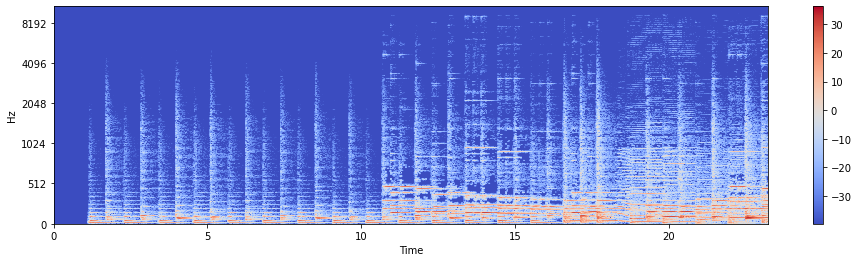

In [34]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(x_freqs_db[:,:1000], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

In [39]:
n_fft=2048
hop_length=512
n_mels=128

mel_spec = librosa.feature.melspectrogram(x, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
mel_spec.shape

(128, 5163)

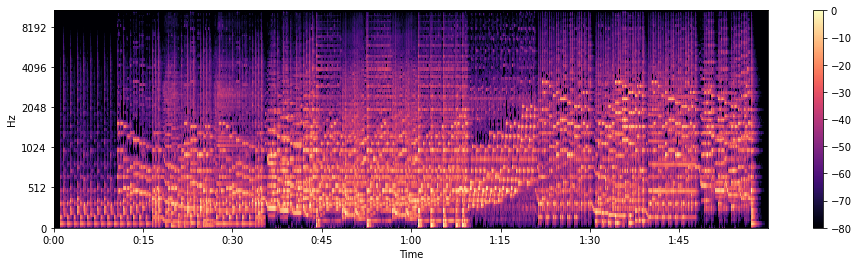

In [47]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

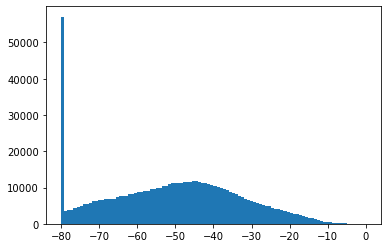

In [50]:
plt.hist(mel_spec_db.reshape(-1), bins=100) #  bins='auto'
plt.show()

In [136]:
def audio_to_melspec(audio, sr, win_size_secs=0.1, n_mels=128, fmin=20):

    # Time parameters (X axis):
    sampling_rate = sr
    n_fft         = int(sr * win_size_secs)
    hop_length    = n_fft // 4
    
    # Frequencies parameters (Y axis):
    fmin          = 20
    fmax          = sampling_rate // 2 # Nyquist theorem
    n_mels        = n_mels
    
    spectrogram = librosa.feature.melspectrogram(
                audio,
                sr          = sampling_rate,
                n_mels      = n_mels,
                hop_length  = hop_length,
                n_fft       = n_fft,
                fmin        = fmin,
                fmax        = fmax)
    
    return spectrogram

def plt_melspec(melspec, sr, hop_length):
    print(melspec.shape)
    plt.figure(figsize=(16, 4))
    melspec_db = librosa.power_to_db(melspec, ref=np.max)
    librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.show()

In [137]:
x.shape

(2643264,)

(512, 109)


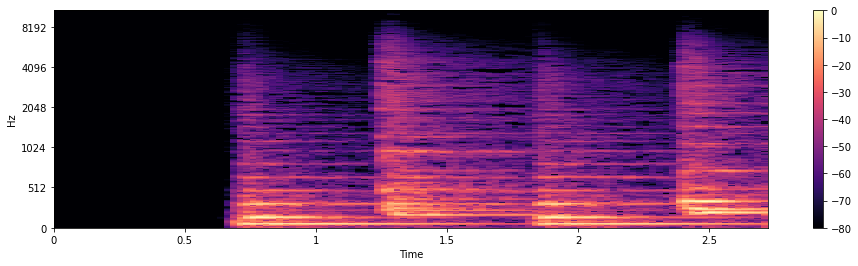

In [138]:
melspec = audio_to_melspec(x[10000:70000], sr, win_size_secs=0.1, n_mels=512)
plt_melspec(melspec, sr, hop_length)

(256, 219)


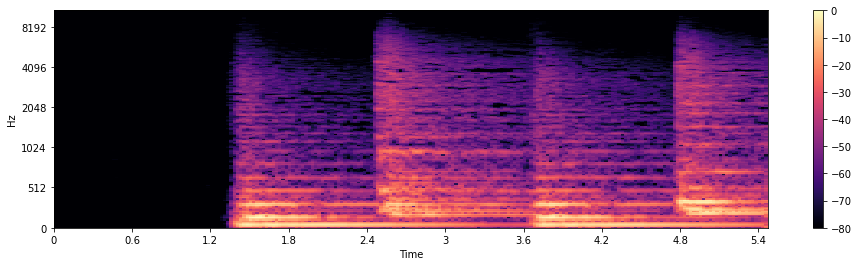

In [139]:
melspec = audio_to_melspec(x[10000:70000], sr, win_size_secs=0.05, n_mels=256)
plt_melspec(melspec, sr, hop_length)

(512, 273)


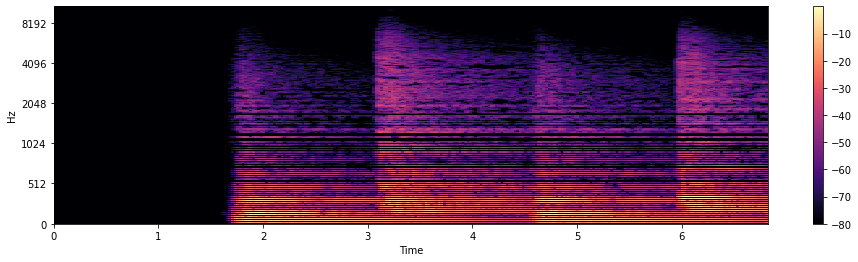

In [140]:
melspec = audio_to_melspec(x[10000:70000], sr, win_size_secs=0.04, n_mels=512)
plt_melspec(melspec, sr, hop_length)

(128, 109)


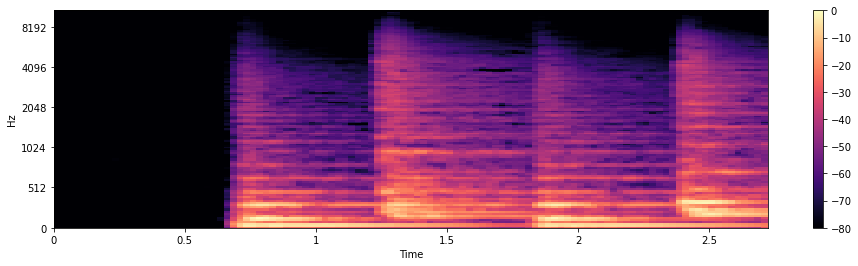

In [99]:
melspec = audio_to_melspec(x[10000:70000], sr, win_size_secs=0.1, n_mels=128)
plt_melspec(melspec, sr, hop_length)

In [56]:
spectrogram = librosa.feature.melspectrogram(
                x,
                sr          = sampling_rate,
                n_mels      = n_mels,
                hop_length  = hop_length,
                n_fft       = win_size,
                fmin        = fmin,
                fmax        = fmax)

In [29]:
x_freqs_db.shape

(1025, 5163)

In [57]:
spectrogram.shape

(128, 4798)

In [ ]:
librosa.display.specshow(mels, x_axis='time', y_axis='mel', 
                             sr=conf.sampling_rate, hop_length=conf.hop_length,
                            fmin=conf.fmin, fmax=conf.fmax)

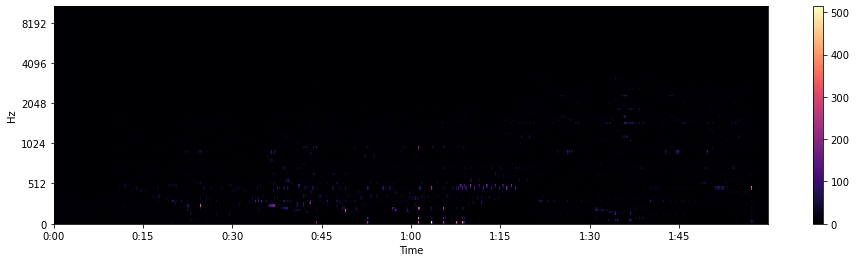

In [58]:
plt.figure(figsize=(16, 4))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

In [78]:
4096/48000

0.08533333333333333

In [79]:
1366/32000

0.0426875